In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [3]:
train.describe()
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [4]:
train.isnull().sum()
test.isnull().sum()
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# combined data for cleansing 
def combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    target = train.Loan_Status
    train.drop('Loan_Status',axis = 1,inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

combined = combined_data()
combined
print(combined.isnull().sum())
# data Cleansing of combined data
combined.fillna({
    'Gender':st.mode(combined.Gender),
    'Married':st.mode(combined.Married),
    'Dependents':st.mode(combined.Dependents),
    'Self_Employed':st.mode(combined.Self_Employed),
    'LoanAmount':np.mean(combined.LoanAmount),
    'Credit_History':np.mean(combined.Credit_History),
    'Loan_Amount_Term':np.mean(combined.Loan_Amount_Term)
},inplace=True)
print(combined.isnull().sum())
# plt.plot(combined.isnull().sum()) # this time it is zero
combined

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.000000,1.00000,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.000000,1.00000,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.000000,1.00000,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.000000,1.00000,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.000000,1.00000,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00000,360.000000,1.00000,Urban
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00000,360.000000,1.00000,Urban
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.00000,360.000000,0.00000,Semiurban
8,Male,Yes,2,Graduate,No,4006,1526.0,168.00000,360.000000,1.00000,Urban
9,Male,Yes,1,Graduate,No,12841,10968.0,349.00000,360.000000,1.00000,Semiurban


In [6]:
# Data Transformation
# One Hot Encoding for qualitative data
# Gender male = 1 and female = 0
def Encoding_Gender():
    combined.Gender = combined.Gender.map({'Male':1,'Female':0})
# Married = 1 and single = 0
def Encoding_Martial():
    combined.Married = combined.Married.map({'No':0,'Yes':1})
def Encoding_Dependents():
    combined['Single'] = combined.Dependents.map(lambda d:1 if d=='1' else 0)
    combined['Small_Family'] = combined.Dependents.map(lambda d:1 if d=='2' else 0)
    combined['Large_Family'] = combined.Dependents.map(lambda d:1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)
def Encoding_Education():
    combined.Education = combined.Education.map({'Graduate':1,'Not Graduate':0})
def Encoding_Self_Employed():
    combined.Self_Employed = combined.Self_Employed.map({'No':0,'Yes':1})
def Encoding_Total_Income():
    combined['Total_Income'] = combined.ApplicantIncome + combined.CoapplicantIncome
    combined.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
def Encoding_loan_amount():
    combined['Dept_Income_Ratio'] = combined.Total_Income / combined.LoanAmount
    

In [7]:
Encoding_Gender()

In [8]:
Encoding_Martial()

In [9]:
Encoding_Dependents()

In [10]:
Encoding_Education()

In [11]:
Encoding_Self_Employed()

In [12]:
Encoding_Total_Income()

In [13]:
Encoding_loan_amount()

In [14]:
combined

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Single,Small_Family,Large_Family,Total_Income,Dept_Income_Ratio
0,1,0,1,0,142.51153,360.000000,1.00000,Urban,0,0,0,5849.0,41.042293
1,1,1,1,0,128.00000,360.000000,1.00000,Rural,1,0,0,6091.0,47.585938
2,1,1,1,1,66.00000,360.000000,1.00000,Urban,0,0,0,3000.0,45.454545
3,1,1,0,0,120.00000,360.000000,1.00000,Urban,0,0,0,4941.0,41.175000
4,1,0,1,0,141.00000,360.000000,1.00000,Urban,0,0,0,6000.0,42.553191
5,1,1,1,1,267.00000,360.000000,1.00000,Urban,0,1,0,9613.0,36.003745
6,1,1,0,0,95.00000,360.000000,1.00000,Urban,0,0,0,3849.0,40.515789
7,1,1,1,0,158.00000,360.000000,0.00000,Semiurban,0,0,1,5540.0,35.063291
8,1,1,1,0,168.00000,360.000000,1.00000,Urban,0,1,0,5532.0,32.928571
9,1,1,1,0,349.00000,360.000000,1.00000,Semiurban,1,0,0,23809.0,68.220630


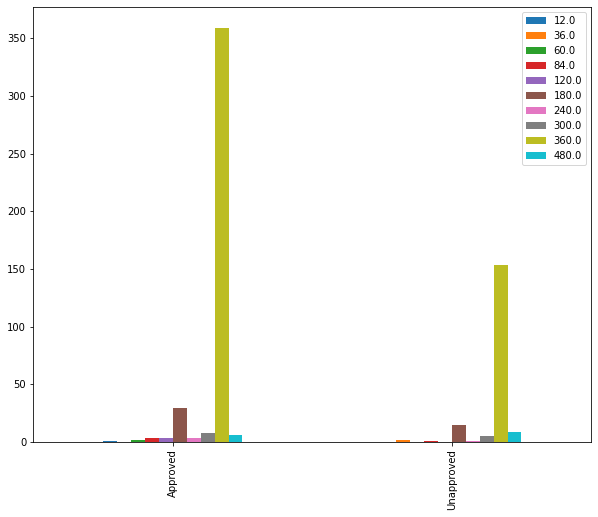

In [15]:
approved_term = train[train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = train[train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', figsize=(10,8))

In [16]:
def Process_LoanAmount_term():
    combined['very_short_term'] = combined.Loan_Amount_Term.map(lambda d: 1 if d > 1 and d <= 60 else 0)
    combined['short_term'] = combined.Loan_Amount_Term.map(lambda d:1 if d>60 and d<180 else 0)
    combined['Long_term'] = combined.Loan_Amount_Term.map(lambda d:1 if d>=180 and d<300 else 0)
    combined['very_long_term'] = combined.Loan_Amount_Term.map(lambda d:1 if d>=300 else 0)
    combined.drop(['Loan_Amount_Term'], axis=1, inplace=True)
def Process_Credit_History():
    combined['Credit_History_bad'] = combined.Credit_History.map(lambda x: 1 if x == 0 else 0)
    combined['Credit_History_good'] = combined.Credit_History.map(lambda x: 1 if x == 1 else 0)
    combined['Credit_History_unknown'] = combined.Credit_History.map(lambda x:1 if x== 2 else 0)
    combined.drop(['Credit_History'], axis=1, inplace= True)
def Process_Proparty_Area():
    combined['Property_Rural'] = combined.Property_Area.map(lambda x: 1 if x == 'Rural' else 0)
    combined['Property_Urban'] = combined.Property_Area.map(lambda x: 1 if x == 'Urban' else 0)
    combined['Property_SemiUrban'] = combined.Property_Area.map(lambda x: 1 if x == 'Semiurban' else 0)
    combined.drop(['Property_Area'], axis=1, inplace= True)

In [17]:
Process_LoanAmount_term()

In [18]:
Process_Credit_History()

In [19]:
Process_Proparty_Area()

In [20]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Single,Small_Family,Large_Family,Total_Income,Dept_Income_Ratio,very_short_term,short_term,Long_term,very_long_term,Credit_History_bad,Credit_History_good,Credit_History_unknown,Property_Rural,Property_Urban,Property_SemiUrban
0,1,0,1,0,142.51153,0,0,0,5849.0,41.042293,0,0,0,1,0,1,0,0,1,0
1,1,1,1,0,128.00000,1,0,0,6091.0,47.585938,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,66.00000,0,0,0,3000.0,45.454545,0,0,0,1,0,1,0,0,1,0
3,1,1,0,0,120.00000,0,0,0,4941.0,41.175000,0,0,0,1,0,1,0,0,1,0
4,1,0,1,0,141.00000,0,0,0,6000.0,42.553191,0,0,0,1,0,1,0,0,1,0


In [21]:
# Scaling the LoanAmount, Totalincome and Dept Income Ratio
def feature_scaling(df):
    df = df - df.min()
    df = df / df.max()
    return df

In [22]:
combined.LoanAmount = feature_scaling(combined.LoanAmount)
combined.Total_Income = feature_scaling(combined.Total_Income)
combined.Dept_Income_Ratio = feature_scaling(combined.Dept_Income_Ratio)

In [23]:
combined.head(30)

,Gender,Married,Education,Self_Employed,LoanAmount,Single,Small_Family,Large_Family,Total_Income,Dept_Income_Ratio,very_short_term,short_term,Long_term,very_long_term,Credit_History_bad,Credit_History_good,Credit_History_unknown,Property_Rural,Property_Urban,Property_SemiUrban
0,1,0,1,0,0.193215,0,0,0,0.055394,0.060682,0,0,0,1,0,1,0,0,1,0
1,1,1,1,0,0.172214,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,0.082489,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,1,0
3,1,1,0,0,0.160637,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,1,0
4,1,0,1,0,0.191027,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,1,0
5,1,1,1,1,0.373372,0,1,0,0.102705,0.050902,0,0,0,1,0,1,0,0,1,0
6,1,1,0,0,0.124457,0,0,0,0.030255,0.059660,0,0,0,1,0,1,0,0,1,0
7,1,1,1,0,0.215630,0,0,1,0.051510,0.049077,0,0,0,1,1,0,0,0,0,1
8,1,1,1,0,0.230101,0,1,0,0.051409,0.044934,0,0,0,1,0,1,0,0,1,0
9,1,1,1,0,0.492041,1,0,0,0.281141,0.113432,0,0,0,1,0,1,0,0,0,1


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
def train_test():
    target = train.Loan_Status.map({'Y':1,'N':0})
    train_ = combined.head(614)
    test = combined.iloc[len(target):]
    return train_,target,test

In [44]:
train_,target,test = train_test()

In [38]:
arguments = {
    'bootstrap':False,
    'min_samples_leaf':3,
    'n_estimators':50,
    'min_samples_split': 10,
    'max_features': 'sqrt',
    'max_depth':6
}
model = RandomForestClassifier(**arguments)
model.fit(train_,target)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
# k fold cross validtion
x_val = cross_val_score(model, train_, target, cv = 5, scoring='accuracy')
np.mean(x_val)

0.8063458487572713

In [80]:
##np.vectorize Define a vectorized function which takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy array
output = model.predict(test)
output_df = pd.DataFrame()
result_df = pd.read_csv('test.csv')
output_df['Loan_ID'] = result_df.Loan_ID
output_df['Loan_Status'] = np.vectorize(lambda x:'Yes' if x == 1 else 'NO')(output)
output_df[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

In [81]:
pd.read_csv("output.csv")

,Loan_ID,Loan_Status
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes
5,LP001054,Yes
6,LP001055,Yes
7,LP001056,NO
8,LP001059,Yes
9,LP001067,Yes
